<a href="https://colab.research.google.com/github/Aldo05art/UTS-DataMining/blob/main/2318046_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Persiapan (Colab): load library & file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set(style="whitegrid", font_scale=1)

In [ ]:
# Jika file ada di sesi (upload)
from google.colab import files
uploaded = files.upload()
file_path = next(iter(uploaded))

Saving covid19_indonesia_cleaned.csv to covid19_indonesia_cleaned.csv


In [ ]:
df = pd.read_csv(file_path, parse_dates=['date'])
print("Shape:", df.shape)
display(df.head())

Shape: (31822, 44)


,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,...,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths,new_cases_was_missing_or_negative,total_cases_recalc,flag_missing_cases,flag_negative_new,flag_spike,flag_total_mismatch
0,2020-03-26,ID-AC,Aceh,1,0,0,1,1,0,1,...,0.00%,100.00%,NaN,NaN,False,1,False,False,False,False
1,2020-03-27,ID-AC,Aceh,3,0,0,3,4,0,1,...,0.00%,25.00%,3.00,1.0,False,4,False,False,False,False
2,2020-03-28,ID-AC,Aceh,1,0,0,1,5,0,1,...,0.00%,20.00%,0.33,1.0,False,5,False,False,False,False
3,2020-03-29,ID-AC,Aceh,0,0,0,0,5,0,1,...,0.00%,20.00%,0.00,1.0,False,5,False,False,False,False
4,2020-03-30,ID-AC,Aceh,0,0,0,0,5,0,1,...,0.00%,20.00%,1.00,1.0,False,5,False,False,False,False


1. Persiapan data untuk visualisasi

In [ ]:
# 1. Normalisasi nama kolom (jika perlu)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Pastikan kolom penting ada
expected = ['date','location','new_cases','total_cases','new_deaths','total_deaths','new_recovered','total_recovered']
print("Has expected cols:", {c: c in df.columns for c in expected})

Has expected cols: {'date': True, 'location': True, 'new_cases': True, 'total_cases': True, 'new_deaths': True, 'total_deaths': True, 'new_recovered': True, 'total_recovered': True}


In [ ]:
nation = df.groupby('date', as_index=False).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'new_recovered': 'sum',
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_recovered': 'sum'
}).sort_values('date')


In [ ]:
# 3. Per-provinsi time series (keep as df)
prov = df.copy().sort_values(['location','date'])

2. Plot: Tren kasus harian nasional (bar + 7-day rolling average)

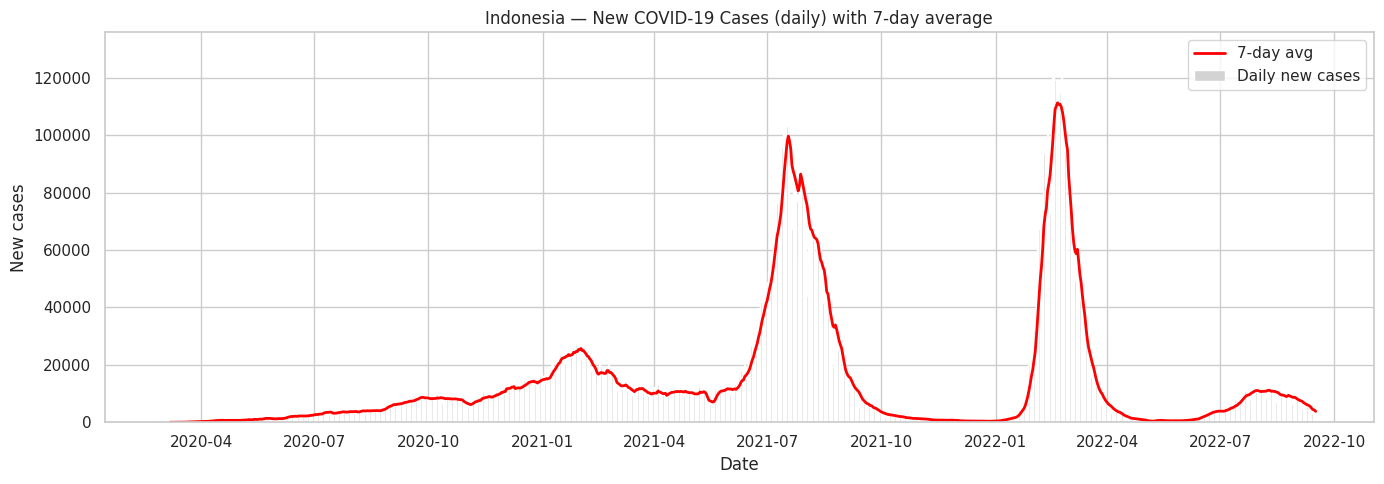

In [ ]:
# 4. Add 7-day rolling average
nation['new_cases_7d'] = nation['new_cases'].rolling(window=7, center=False).mean()
nation['new_deaths_7d'] = nation['new_deaths'].rolling(window=7).mean()

plt.figure(figsize=(14,5))
plt.bar(nation['date'], nation['new_cases'], color='lightgrey', label='Daily new cases', width=1)
plt.plot(nation['date'], nation['new_cases_7d'], color='red', linewidth=2, label='7-day avg')
plt.title('Indonesia — New COVID-19 Cases (daily) with 7-day average')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.legend()
plt.tight_layout()
plt.savefig("nation_new_cases_trend.png", dpi=150)
plt.show()

3. Plot: Tren kematian harian nasional

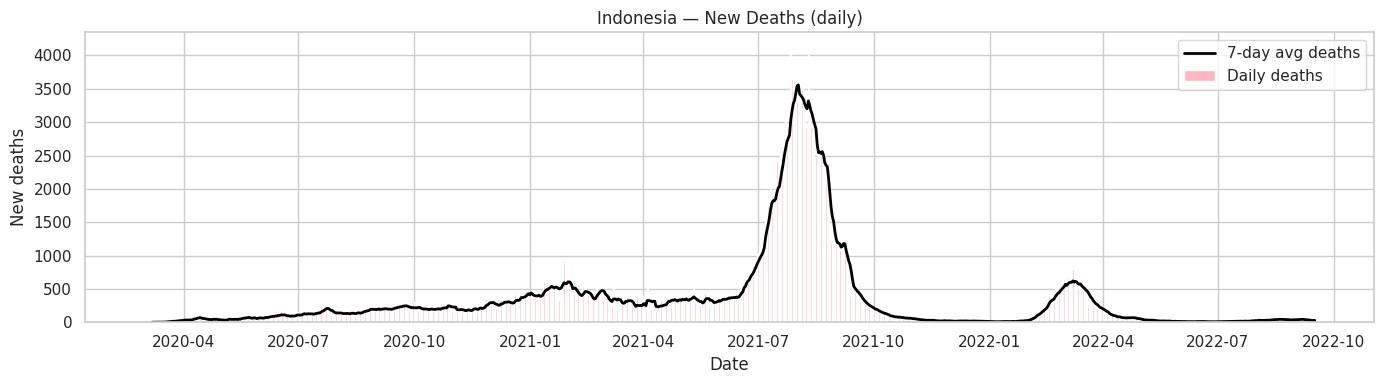

In [ ]:
plt.figure(figsize=(14,4))
plt.bar(nation['date'], nation['new_deaths'], color='lightpink', width=1, label='Daily deaths')
plt.plot(nation['date'], nation['new_deaths_7d'], color='black', linewidth=2, label='7-day avg deaths')
plt.title('Indonesia — New Deaths (daily)')
plt.xlabel('Date'); plt.ylabel('New deaths')
plt.legend(); plt.tight_layout()
plt.savefig("nation_new_deaths_trend.png", dpi=150)
plt.show()

4. Per-provinsi: pilih top N provinsi berdasarkan total cases (compare)

In [ ]:
# 5. Top N provinsi by total cases (latest date)
latest = df[df['date'] == df['date'].max()]
top_provs = latest.groupby('location', as_index=False)['total_cases'].sum().sort_values('total_cases', ascending=False).head(8)
top_list = top_provs['location'].tolist()
print("Top provinces:", top_list)

Top provinces: ['Indonesia']


4. Per-provinsi: pilih top N provinsi berdasarkan total cases (compare)

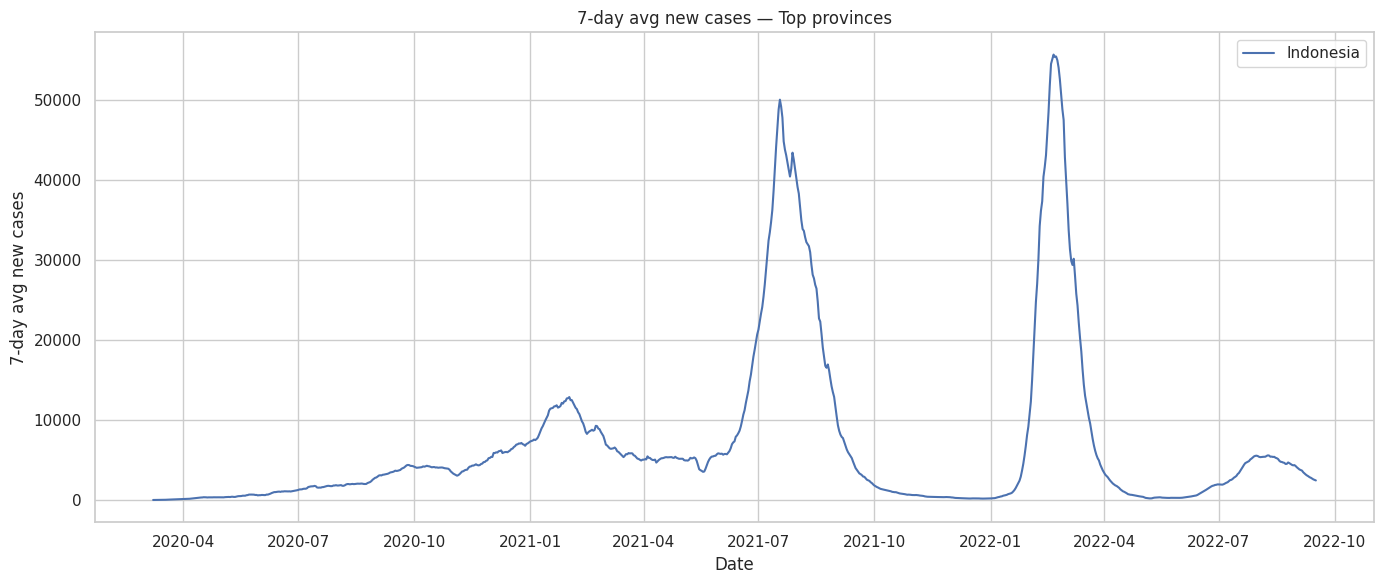

In [ ]:
# 6. Plot time series multiple provinces
plt.figure(figsize=(14,6))
for loc in top_list:
    s = prov[prov['location']==loc].set_index('date')['new_cases'].rolling(window=7).mean()
    plt.plot(s.index, s.values, label=loc)
plt.title('7-day avg new cases — Top provinces')
plt.xlabel('Date'); plt.ylabel('7-day avg new cases')
plt.legend(); plt.tight_layout()
plt.savefig("top_provinces_trend.png", dpi=150)
plt.show()

5. Heatmap korelasi / matriks korelasi numerik

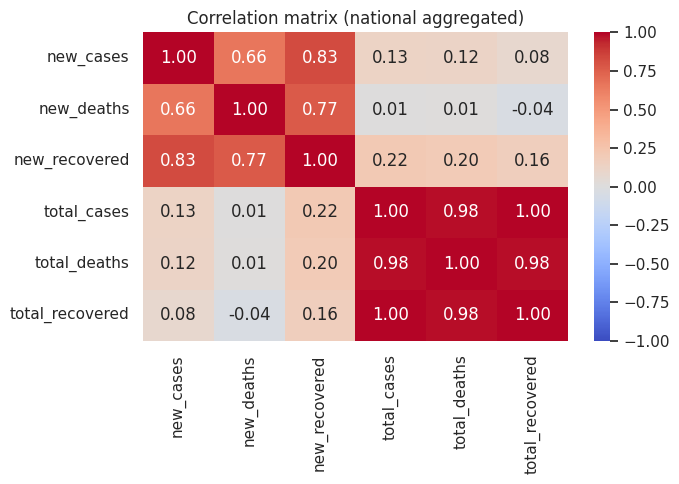

In [ ]:
# 7. Correlation on national aggregated numeric columns
num_cols = ['new_cases','new_deaths','new_recovered','total_cases','total_deaths','total_recovered']
corr = nation[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (national aggregated)')
plt.tight_layout()
plt.savefig("corr_heatmap.png", dpi=150)
plt.show()

6. Distribusi: histogram / boxplot (untuk deteksi outlier)

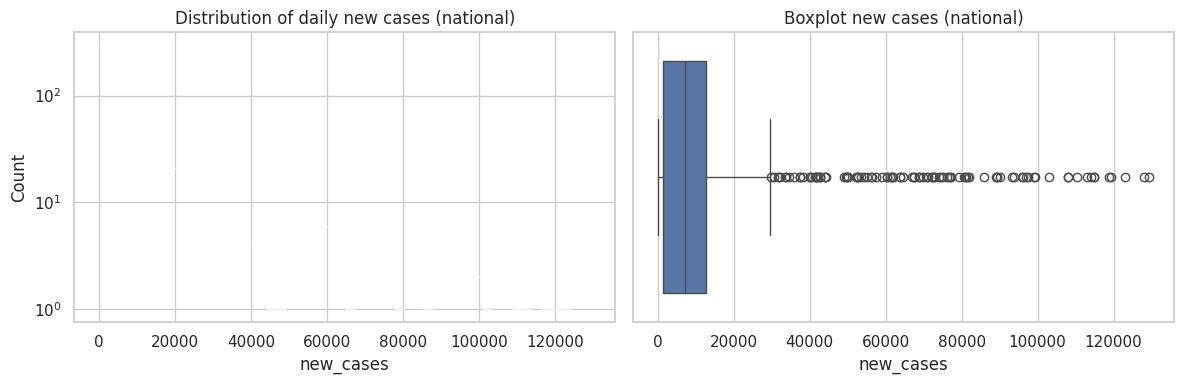

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(nation['new_cases'], bins=50, log_scale=(False, True))
plt.title('Distribution of daily new cases (national)')

plt.subplot(1,2,2)
sns.boxplot(x=nation['new_cases'])
plt.title('Boxplot new cases (national)')
plt.tight_layout()
plt.savefig("dist_box_new_cases.png", dpi=150)
plt.show()


8. Grafik perbandingan kumulatif (stacked / line)

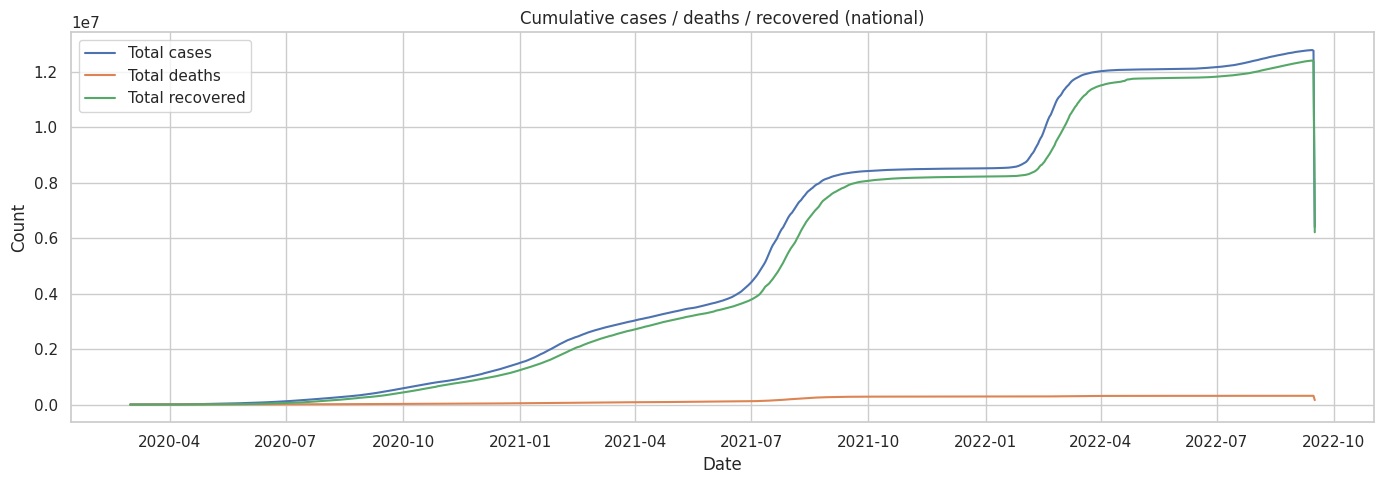

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(nation['date'], nation['total_cases'], label='Total cases')
plt.plot(nation['date'], nation['total_deaths'], label='Total deaths')
plt.plot(nation['date'], nation['total_recovered'], label='Total recovered')
plt.title('Cumulative cases / deaths / recovered (national)')
plt.xlabel('Date'); plt.ylabel('Count')
plt.legend(); plt.tight_layout()
plt.savefig("cumulative_nation.png", dpi=150)
plt.show()


9. Plotly Express menghasilkan grafik yang bisa di-zoom & hover:

In [ ]:
# !pip install plotly
import plotly.express as px
fig = px.line(nation, x='date', y='new_cases_7d', title='7-day avg new cases (national)')
fig.show()


/tmp/ipython-input-3643292631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='province', data=prov_cases, palette='viridis')


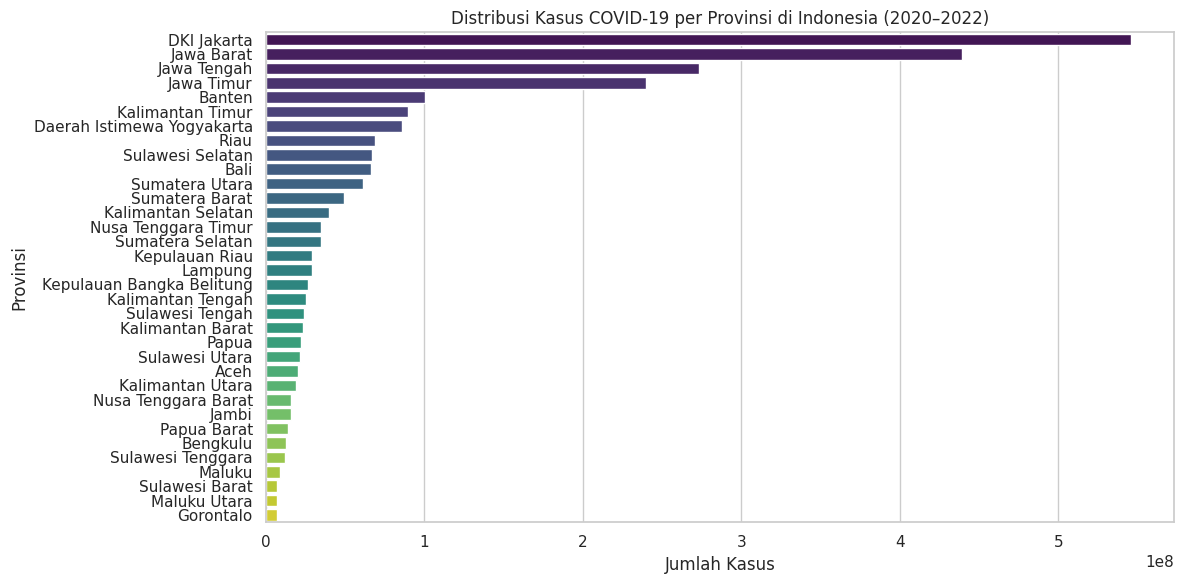

In [ ]:
plt.figure(figsize=(12,6))
prov_cases = df.groupby('province')['total_cases'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='total_cases', y='province', data=prov_cases, palette='viridis')
plt.title('Distribusi Kasus COVID-19 per Provinsi di Indonesia (2020–2022)')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()